In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image  import load_img

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_ds = train_gen.flow_from_directory("/content/drive/MyDrive/Data sets/acc_dataset/train",target_size=(150,150),batch_size=32)

Found 791 images belonging to 2 classes.


In [ ]:
train_ds.class_indices

{'Accident': 0, 'Non Accident': 1}

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory("/content/drive/MyDrive/Data sets/acc_dataset/val",target_size=(150,150),batch_size=32)

Found 98 images belonging to 2 classes.


In [ ]:
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_ds = test_gen.flow_from_directory("/content/drive/MyDrive/Data sets/acc_dataset/test",target_size=(150,150),batch_size=32)

Found 100 images belonging to 2 classes.


In [ ]:
base_model = Xception(weights='imagenet',include_top=False,input_shape=(150,150,3))
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(150,150,3))
base = base_model(inputs,training=False)
pooling = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(2)(pooling)
model = keras.Model(inputs,outputs)
optimize = keras.optimizers.Adam(learning_rate = 0.01)
loss = keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer=optimize,loss=loss,metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5804 - loss: 0.9206 - val_accuracy: 0.7857 - val_loss: 0.4469
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - accuracy: 0.7510 - loss: 0.5094 - val_accuracy: 0.8776 - val_loss: 0.3433
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 345ms/step - accuracy: 0.8615 - loss: 0.3403 - val_accuracy: 0.8367 - val_loss: 0.3819
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.8499 - loss: 0.3430 - val_accuracy: 0.9286 - val_loss: 0.2797
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.9173 - loss: 0.2461 - val_accuracy: 0.8980 - val_loss: 0.2732
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 336ms/step - accuracy: 0.9404 - loss: 0.2190 - val_accuracy: 0.9082 - val_loss: 0.2240
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.9405 - loss: 0.2017 - val_accuracy: 0.9082 - val_loss: 0.2351
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 372ms/step - accuracy: 0.9489 - loss: 0.1820 - val_accuracy: 0.91

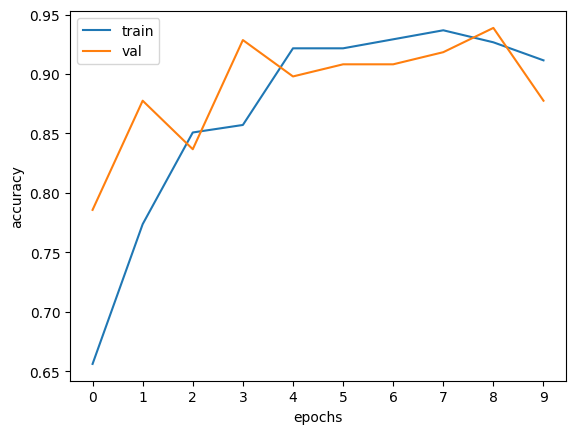

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(np.arange(10))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["train","val"])
plt.show()

In [ ]:
def model_make(learning_rate=0.01):
  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs,training=False)
  pooling = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(2)(pooling)
  model = keras.Model(inputs,outputs)
  optimize = keras.optimizers.Adam(learning_rate = learning_rate)
  loss = keras.losses.BinaryCrossentropy(from_logits=True)
  model.compile(optimizer=optimize,loss=loss,metrics=['accuracy'])
  return model

In [ ]:
scores = {}
for learning_rate in [0.001,0.01,0.1]:
  print(f"-------{learning_rate}-----------")
  model = model_make(learning_rate=learning_rate)
  history = model.fit(train_ds,epochs=10,validation_data=val_ds)
  scores[learning_rate] = history
  print("\n\n")


-------0.001-----------
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 807ms/step - accuracy: 0.5604 - loss: 0.6994 - val_accuracy: 0.7347 - val_loss: 0.5368
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.7140 - loss: 0.5706 - val_accuracy: 0.7857 - val_loss: 0.4928
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 337ms/step - accuracy: 0.7446 - loss: 0.5195 - val_accuracy: 0.8163 - val_loss: 0.4593
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.7756 - loss: 0.4752 - val_accuracy: 0.7959 - val_loss: 0.4597
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.8112 - loss: 0.4672 - val_accuracy: 0.8163 - val_loss: 0.4332
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - accuracy: 0.8175 - loss: 0.4348 - val_accuracy: 0.8367 - val_loss: 0.4029
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.8185 - loss: 0.4237 - val_accuracy: 0.8571 - val_loss: 0.4097
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.8439 - loss: 

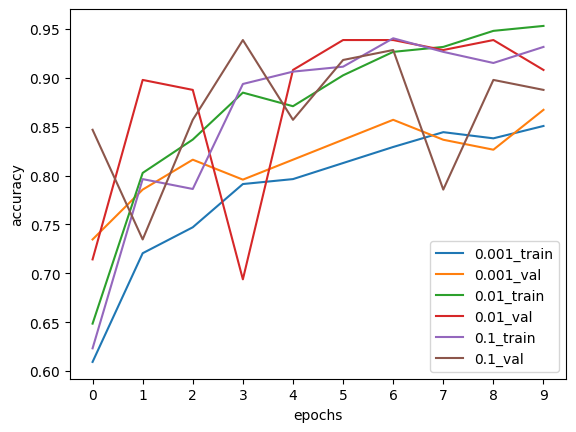

In [ ]:
plt.plot(scores[0.001].history['accuracy'])
plt.plot(scores[0.001].history['val_accuracy'])
plt.plot(scores[0.01].history['accuracy'])
plt.plot(scores[0.01].history['val_accuracy'])
plt.plot(scores[0.1].history['accuracy'])
plt.plot(scores[0.1].history['val_accuracy'])
plt.legend(['0.001_train','0.001_val','0.01_train','0.01_val','0.1_train','0.1_val'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xticks(np.arange(10))
plt.show()

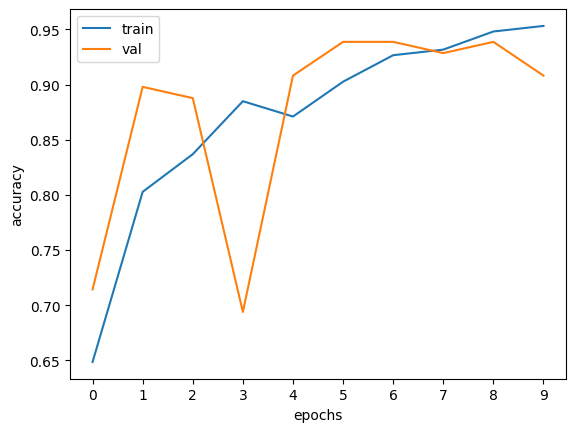

In [ ]:
plt.plot(scores[0.01].history['accuracy'])
plt.plot(scores[0.01].history['val_accuracy'])
plt.xticks(np.arange(10))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["train","val"])
plt.show()

In [ ]:
learning_rate = 0.01

In [ ]:
def model_make(learning_rate=0.01):
  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs,training=False)
  pooling = keras.layers.GlobalAveragePooling2D()(base)
  inner = keras.layers.Dense(100,activation='relu')(pooling)
  drop = keras.layers.Dropout(0.2)(inner)
  outputs = keras.layers.Dense(2)(drop)
  model = keras.Model(inputs,outputs)
  optimize = keras.optimizers.Adam(learning_rate = learning_rate)
  loss = keras.losses.BinaryCrossentropy(from_logits=True)
  model.compile(optimizer=optimize,loss=loss,metrics=['accuracy'])
  return model

In [ ]:
model = model_make(learning_rate=learning_rate)
history = model.fit(train_ds,epochs=10,validation_data=val_ds)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 884ms/step - accuracy: 0.6097 - loss: 11.1914 - val_accuracy: 0.6020 - val_loss: 0.7374
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.6130 - loss: 0.7266 - val_accuracy: 0.5918 - val_loss: 0.6353
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.5791 - loss: 0.6729 - val_accuracy: 0.5918 - val_loss: 0.6438
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.5608 - loss: 0.6645 - val_accuracy: 0.5918 - val_loss: 0.6433
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.6072 - loss: 0.6450 - val_accuracy: 0.6122 - val_loss: 0.6332
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 337ms/step - accuracy: 0.6278 - loss: 0.6249 - val_accuracy: 0.7449 - val_loss: 0.5220
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 372ms/step - accuracy: 0.6072 - loss: 0.6394 - val_accuracy: 0.6735 - val_loss: 0.5821
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.6521 - loss: 0.5996 - val_accuracy: 

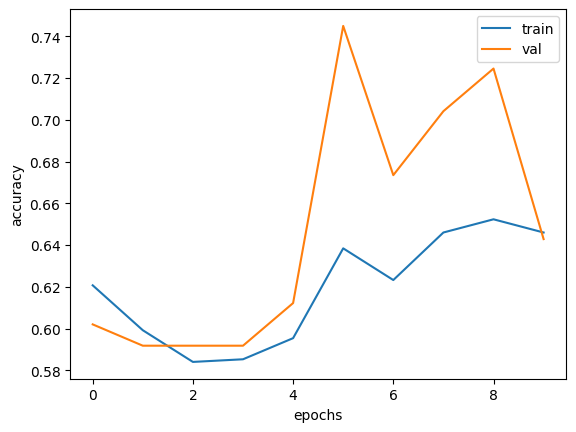

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# model performing good accuracy without dropout and inner layer

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('acc_model_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only=True,
                                             monitor = 'val_accuracy',
                                             mode = 'max')

In [ ]:
def model_make(learning_rate=0.01):
  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs,training=False)
  pooling = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(2)(pooling)
  model = keras.Model(inputs,outputs)
  optimize = keras.optimizers.Adam(learning_rate = learning_rate)
  loss = keras.losses.BinaryCrossentropy(from_logits=True)
  model.compile(optimizer=optimize,loss=loss,metrics=['accuracy'])
  return model

In [ ]:
model = model_make(learning_rate=0.01)
history = model.fit(train_ds,epochs=10,validation_data=val_ds,callbacks=[checkpoint])

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.6098 - loss: 0.8254

25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 823ms/step - accuracy: 0.6117 - loss: 0.8212 - val_accuracy: 0.8061 - val_loss: 0.4364
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.8075 - loss: 0.4102

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.8076 - loss: 0.4100 - val_accuracy: 0.8469 - val_loss: 0.3329
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.8232 - loss: 0.3616

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.8241 - loss: 0.3605 - val_accuracy: 0.8776 - val_loss: 0.3313
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 352ms/step - accuracy: 0.8501 - loss: 0.3367 - val_accuracy: 0.8163 - val_loss: 0.3193
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.8859 - loss: 0.2683

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.8861 - loss: 0.2684 - val_accuracy: 0.9082 - val_loss: 0.2625
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.9128 - loss: 0.2372 - val_accuracy: 0.8980 - val_loss: 0.2286
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9419 - loss: 0.1931

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.9414 - loss: 0.1937 - val_accuracy: 0.9388 - val_loss: 0.2140
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - accuracy: 0.9219 - loss: 0.2159 - val_accuracy: 0.9184 - val_loss: 0.2174
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.9537 - loss: 0.1593 - val_accuracy: 0.9082 - val_loss: 0.2070
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 348ms/step - accuracy: 0.9520 - loss: 0.1652 - val_accuracy: 0.8980 - val_loss: 0.2251


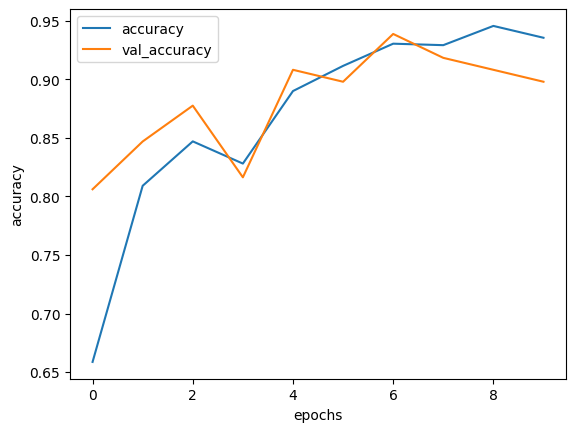

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

# building large model

In [ ]:
size = 299

In [ ]:
base_model_large = Xception(weights='imagenet',include_top=False,input_shape=(size,size,3))
base_model_large.trainable = False

In [ ]:
train_ds = train_gen.flow_from_directory("/content/drive/MyDrive/Data sets/acc_dataset/train",target_size = (size,size), batch_size = 32)
val_ds = val_gen.flow_from_directory("/content/drive/MyDrive/Data sets/acc_dataset/val",target_size=(size,size),batch_size = 32)

Found 791 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
def model_make(learning_rate=0.01,size=299):
  inputs = keras.Input(shape=(size,size,3))
  base = base_model_large(inputs,training=False)
  pooling = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(2)(pooling)
  model = keras.Model(inputs,outputs)
  optimize = keras.optimizers.Adam(learning_rate = learning_rate)
  loss = keras.losses.BinaryCrossentropy(from_logits=True)
  model.compile(optimizer=optimize,loss=loss,metrics=['accuracy'])
  return model

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('acc_model_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only=True,
                                             monitor = 'val_accuracy',
                                             mode = 'max')

In [ ]:
model = model_make(learning_rate=0.01,size=size)
history = model.fit(train_ds,epochs=10,validation_data=val_ds,callbacks=[checkpoint])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6146 - loss: 0.6670

25/25 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.6168 - loss: 0.6642 - val_accuracy: 0.8061 - val_loss: 0.4533
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 455ms/step - accuracy: 0.7684 - loss: 0.4519 - val_accuracy: 0.7449 - val_loss: 0.4517
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8292 - loss: 0.3966

25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 498ms/step - accuracy: 0.8289 - loss: 0.3968 - val_accuracy: 0.8571 - val_loss: 0.3686
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 424ms/step - accuracy: 0.8207 - loss: 0.3899 - val_accuracy: 0.8469 - val_loss: 0.3762
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.8497 - loss: 0.3218

25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 452ms/step - accuracy: 0.8498 - loss: 0.3224 - val_accuracy: 0.8673 - val_loss: 0.3232
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.9103 - loss: 0.2826

25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 449ms/step - accuracy: 0.9099 - loss: 0.2831 - val_accuracy: 0.8776 - val_loss: 0.3144
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.9015 - loss: 0.2652

25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - accuracy: 0.9016 - loss: 0.2654 - val_accuracy: 0.8878 - val_loss: 0.2963
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.9058 - loss: 0.2693

25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 477ms/step - accuracy: 0.9056 - loss: 0.2693 - val_accuracy: 0.8980 - val_loss: 0.2864
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.9001 - loss: 0.2571

25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 461ms/step - accuracy: 0.8998 - loss: 0.2576 - val_accuracy: 0.9082 - val_loss: 0.2870
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 473ms/step - accuracy: 0.9189 - loss: 0.2385 - val_accuracy: 0.8776 - val_loss: 0.2949


In [ ]:
test_ds = test_gen.flow_from_directory("/content/drive/MyDrive/Data sets/acc_dataset/test",target_size=(size,size),batch_size = 32)

Found 100 images belonging to 2 classes.


In [ ]:
model = keras.models.load_model('/content/acc_model_09_0.908.h5')
model.evaluate(test_ds)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.8643 - loss: 0.2888


[0.24978336691856384, 0.8899999856948853]

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open ("accident_model.tflite","wb") as f_out:
  f_out.write(tflite_model)

Saved artifact at '/tmp/tmp2jv9uudf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_layer_9')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137410246372496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410244725840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410244730832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410246371728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410244731408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410244730448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410244725648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410244731216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410244725264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137410244732368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1374102447317

In [ ]:
!pip install tflite-runtime
!pip install keras-image-helper


ERROR: Could not find a version that satisfies the requirement tflite-runtime (from versions: none)
ERROR: No matching distribution found for tflite-runtime


In [ ]:
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/Models/accident_model.tflite')
interpreter.allocate_tensors()

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [ ]:
from keras_image_helper import create_preprocessor

In [ ]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
preprocessor = create_preprocessor('xception',target_size=(299,299))
x = preprocessor.from_url("https://images.unsplash.com/photo-1713623311317-d3c43a4be4cf?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8dHJhZmZpYyUyMGFjY2lkZW50fGVufDB8fDB8fHww")
interpreter.set_tensor(input_index,x)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)[0]
predicted_index = np.argmax(preds)
class_names = ['accident','non accidet']
predicted_class = class_names[predicted_index]
print(predicted_class,predicted_index)

accident 0
